In [27]:
!pip install anomalib torchshow

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from anomalib.data import MVTecAD, PredictDataset
from anomalib.models import Patchcore, Ganomaly, Stfpm
from anomalib.engine import Engine
import torchshow


# Initialize dataset
datamodule = MVTecAD(
    root="/content/drive/MyDrive/datasets/MVTecAD",
    category="wood",
    train_batch_size=32,
    eval_batch_size=32,
    num_workers=2,
)


In [15]:
engine = Engine(
    max_epochs=1,
    enable_progress_bar=False,
)

# Train Patchcore
model_patchcore = Patchcore()
engine.fit(datamodule=datamodule, model=model_patchcore)
engine.trainer.save_checkpoint("/content/drive/MyDrive/models/patchcore.ckpt")

# Save for perfomance evaluation
results_patchcore = engine.test(datamodule=datamodule, model=model_patchcore)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor   │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor  │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator      │      0 │ train │     0 │
│ 3 │ model          │ PatchcoreModel │ 24.9 M │ train │     0 │
└───┴────────────────┴────────────────┴────────┴───────┴───────┘

Trainable params: 24.9 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 24.9 M                                                                                               
Total estimated model params size (MB): 99                                                                         
Modules in train mode: 19                                                                                          
Modules in eval mode: 174                                                                                          
Total FLOPs: 0

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:534: Found 174 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.
Selecting Coreset Indices.: 100%|██████████| 25292/25292 [01:41<00:00, 249.40it/s]
INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: `weights_only` was not set, defaulting to `False`.
INFO:lightning.pytorch.trainer.connectors.checkpoint_connector:`weights_only` was not set, defaulting to `False`.
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9859649538993835     │
│       image_F1Score       │    0.9586777091026306     │
│        pixel_AUROC        │     0.931346595287323     │
│       pixel_F1Score       │    0.4667631983757019     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
# engine = Engine(max_epochs=10)

# # Train Ganomaly
# model_ganomaly = Ganomaly()
# engine.fit(datamodule=datamodule, model=model_ganomaly)
# engine.trainer.save_checkpoint("/content/drive/MyDrive/models/ganomaly.ckpt")

# # Save for perfomance evaluation
# results_ganomaly = engine.test(datamodule=datamodule, model=model_ganomaly)

In [16]:
# train Stfpm
engine = Engine(max_epochs=21)

model_stfpm = Stfpm()
engine.fit(datamodule=datamodule, model=model_stfpm)
engine.trainer.save_checkpoint("/content/drive/MyDrive/models/stfpm.ckpt")

# Save for perfomance evaluation
results_stfpm = engine.test(datamodule=datamodule, model=model_stfpm)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ pre_processor  │ PreProcessor  │      0 │ train │     0 │
│ 1 │ post_processor │ PostProcessor │      0 │ train │     0 │
│ 2 │ evaluator      │ Evaluator     │      0 │ train │     0 │
│ 3 │ model          │ STFPMModel    │  5.6 M │ train │     0 │
│ 4 │ loss           │ STFPMLoss     │      0 │ train │     0 │
└───┴────────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 2.8 M                                                                                            
Non-trainable params: 2.8 M                                                                                        
Total params: 5.6 M                                                                                                
Total estimated model params size (MB): 22                                                                         
Modules in train mode: 89                                                                                          
Modules in eval mode: 69                                                                                           
Total FLOPs: 0

Output()

/usr/local/lib/python3.12/dist-packages/lightning/pytorch/loops/fit_loop.py:534: Found 69 module(s) in eval mode at the start of training. This may lead to unexpected behavior during training. If this is intentional, you can ignore this warning.


/usr/local/lib/python3.12/dist-packages/lightning/pytorch/core/module.py:522: You called `self.log('train_loss', 
..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`

INFO:lightning_fabric.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=21` reached.


INFO: `weights_only` was not set, defaulting to `False`.
INFO:lightning.pytorch.trainer.connectors.checkpoint_connector:`weights_only` was not set, defaulting to `False`.
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, PostProcessor, PreProcessor
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9956139922142029     │
│       image_F1Score       │    0.9830508232116699     │
│        pixel_AUROC        │    0.9342232942581177     │
│       pixel_F1Score       │    0.5453596711158752     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
# Compare results
print("\n=== Model Comparison ===")
print(f"Patchcore: {results_patchcore}")
# print(f"GANomaly: {results_ganomaly}")
print(f"Stfpm: {results_stfpm}")


=== Model Comparison ===
Patchcore: [{'image_AUROC': 1.0, 'image_F1Score': 0.9919999837875366, 'pixel_AUROC': 0.9855636358261108, 'pixel_F1Score': 0.7269299626350403}]
Stfmp: [{'image_AUROC': 0.9920635223388672, 'image_F1Score': 0.9760000109672546, 'pixel_AUROC': 0.9625513553619385, 'pixel_F1Score': 0.6402065753936768}]


In [ ]:
# # Load models
# loaded_patchcore = Patchcore.load_from_checkpoint("/content/drive/MyDrive/models/patchcore.ckpt")
# # loaded_ganomaly = Ganomaly.load_from_checkpoint("/content/drive/MyDrive/models/ganomaly.ckpt")
# loaded_stfpm = Stfpm.load_from_checkpoint("/content/drive/MyDrive/models/stfpm.ckpt")

In [22]:
# Get predictions
engine = Engine()
model = Stfpm()


dataset = PredictDataset(
    path="/content/drive/MyDrive/test/images",
    image_size=(256, 256),
)

predictions = engine.predict(
    model=model,
    dataset=dataset,
    ckpt_path="/content/drive/MyDrive/models/stfpm.ckpt",
)

INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/models/stfpm.ckpt
/usr/local/lib/python3.12/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:566: The dirpath has changed from '/content/results/Stfpm/MVTecAD/wood/v1/weights/lightning' to '/content/results/Stfpm/latest/weights/lightning', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DE

Output()

['/content/drive/MyDrive/test/images/Seamless-Wood-Texture-3-153608036.jpg']: True, 1.0


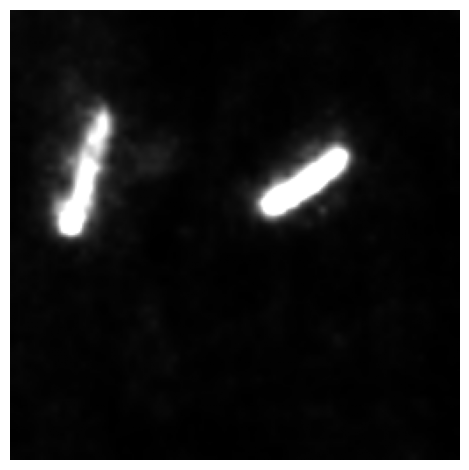

['/content/drive/MyDrive/test/images/Seamless-Wood-Texture-3-1536080376.jpg']: False, 0.4975419044494629


In [31]:
# 5. Access the results
if predictions is not None:
    for prediction in predictions:
        image_path = prediction.image_path
        anomaly_map = prediction.anomaly_map  # Pixel-level anomaly heatmap
        pred_label = prediction.pred_label  # Image-level label (0: normal, 1: anomalous)
        pred_score = prediction.pred_score  # Image-level anomaly scor
        print(f'{image_path}: {str(bool(pred_label[0]))}, {str(float(pred_score[0]))}')
        if bool(pred_label[0]):
            torchshow.show(anomaly_map)